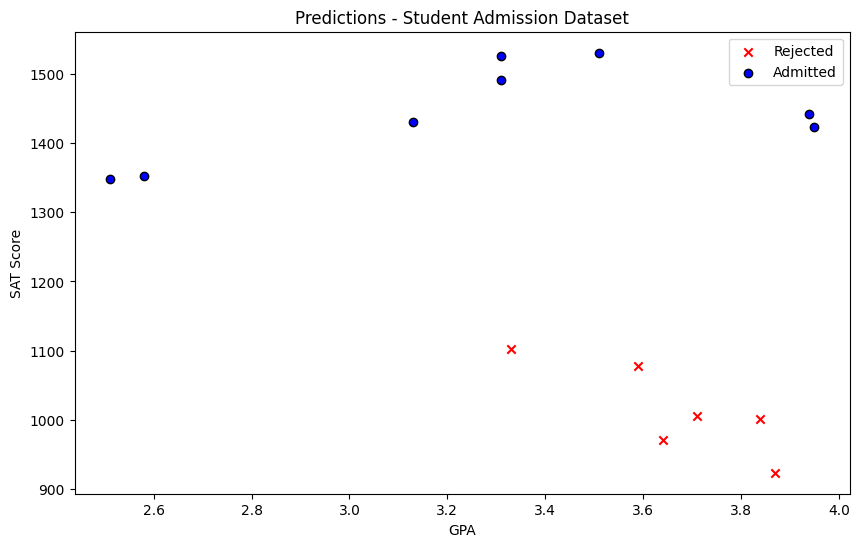

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Charger les données
data = pd.read_csv('C:/Users/hp/Downloads/student_admission_dataset.csv')

# Diviser les données en caractéristiques (X) et étiquettes de classe (y)
X = data[['GPA', 'SAT_Score']].values
y = data['Admission_Status'].values

# Convertir les étiquettes de classe en valeurs numériques
le = LabelEncoder()
y = le.fit_transform(y)

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prédire les classes sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Filtrer les prédictions correctes
correct_predictions = X_test[y_test == y_pred]
incorrect_predictions = X_test[y_test != y_pred]

# Créer un DataFrame pour stocker les prédictions et les scores
predictions_df = pd.DataFrame(correct_predictions, columns=['GPA', 'SAT_Score'])
predictions_df['Admission_Status'] = le.inverse_transform(y_pred[y_test == y_pred])

# Trier les prédictions par ordre croissant des scores
predictions_df = predictions_df.sort_values(by='SAT_Score')

# Diviser les prédictions en étudiants admis et refusés
admitted_students = predictions_df[predictions_df['Admission_Status'] == 'Accepted']
rejected_students = predictions_df[predictions_df['Admission_Status'] == 'Rejected']

# Afficher les prédictions
plt.figure(figsize=(10, 6))
plt.scatter(rejected_students['GPA'], rejected_students['SAT_Score'], c='red', marker='x', label='Rejected')
plt.scatter(admitted_students['GPA'], admitted_students['SAT_Score'], c='blue', marker='o', edgecolors='k', label='Admitted')
plt.xlabel('GPA')
plt.ylabel('SAT Score')
plt.title('Predictions - Student Admission Dataset')
plt.legend()
plt.show()
